# Анализ компьютерных игр

# Введение

Перед нами представлены данные из открытых источников о продажах компьютерных игр в трех крупнейших регионах (Северная Америка, Европа и Япония, а также прочие страны) в милионнах копий, оценки пользователей и экспертов, жанры и платформы, возрастная категория, для которой подходит каждая из игр. Временной период: 2016 год (возможны неполные данные) и данные за предыдущие периоды.

Цель проведения исследования: выявить определяющие успешность игры закономерности для планирования потенциально эффективной рекламной кампании. Для достижения поставленной цели предстоит решить ряд задач, представленных в оглавлении ниже.

# Оглавление 
1. [Общая информация о данных](#step1)
2. [Предобработка данных](#step2)
3. [Исследовательский анализ данных](#step3)
    1. [Анализ продаж игр по годам](#step3.1)
    2. [Анализ продаж игр по платформам](#step3.2)
    3. [Определение потенциально прибыльных платформ в 2017 году](#step3.3)
    4. [Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам](#step3.4)
    5. [Анализ влияния оценок пользователей и критиков на продажи игр](#step3.5)
    6. [Анализ распределения игр по жанрам](#step3.6)  
4. [Определение портрета пользователя по регионам](#step4)
5. [Проверка гипотез](#step5)
    1. [Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC](#hyp1)
    2. [Гипотеза о различии пользовательских рейтингов жанров Action и Sports](#hyp2)
5. [Общий вывод](#step6)

# Раздел 1. Общая информация о данных <a name="step1"></a>

У нас имеется таблица с данными. Посмотрим на них.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15972,Sengoku Hime: Senran ni Mau Otometachi,PS2,2009.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
7300,Star Wars: The Force Unleashed II,DS,2010.0,Action,0.17,0.03,0.00,0.02,43.0,4,T
8937,Tamagotchi no Narikiri Channel,DS,2009.0,Role-Playing,0.00,0.00,0.15,0.00,NaN,NaN,NaN
1536,The Elder Scrolls Online,XOne,2015.0,Role-Playing,0.78,0.38,0.00,0.12,77.0,8.4,M
1010,Kirby's Adventure,NES,1993.0,Platform,0.79,0.14,0.80,0.02,NaN,NaN,NaN
958,inFAMOUS 2,PS3,2011.0,Action,1.05,0.47,0.08,0.22,83.0,8.4,T
7797,Jikkyou Powerful Pro Yakyuu '96 Kaimakuban,SNES,1996.0,Sports,0.00,0.00,0.19,0.00,NaN,NaN,NaN
3428,Final Fantasy Anniversary Edition,PSP,2007.0,Role-Playing,0.39,0.02,0.13,0.04,67.0,7.7,E10+
3674,Red Dead Revolver,XB,2004.0,Shooter,0.40,0.12,0.00,0.02,74.0,8.5,M
471,Far Cry 3,X360,2012.0,Shooter,1.38,1.32,0.02,0.28,91.0,8.6,M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим отдельно на значения в столбце Rating, т.к. для нас они не являются знакомыми.

In [5]:
data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

### Вывод

При первом взгляде на данные видим следующие особенности.
1. Всего в датасете представлены данные по 16715 играм.
2. 2 игры не имеют названия и жанра, возможно, это одни и те же игры. Т.к. их единичное количество, можно будет их убрать из таблицы.
3. Почти по половине игр нет оценки критиков, пользователей, а также не представлено возрастное ограничение. Возможные причины: игры вышли совсем недавно и их не успели оценить, либо по какой-то причине эти игры не подвержены оценке (например, это какие-то спонсорские проекты или "нелецензированные", не имевшие официального релиза) либо их оценили так мало пользователей/экспертов (непопулярные игры), что количества голосов не хватило для формирования рейтинга.
Вряд ли можно предложить адекватную замену пропущенных значений в этих столбцах: брать средний показатель для аналогичного года/платформы/года выпуска может быть совершенно некорректно, т.к. игры могут быть схожими по характеристикам, но абсолютно разными по тому, как их воспринимают критики и пользователи. Можно было бы посмотреть на уровень продаж. Т.е. довольно логично, что высоко оцененные игры скорее всего покупают в среднем больше, однако здесь тоже можно ошибиться: условную игру по мотивам культового фильма будут покупать очень активно просто потому, что она основана на популярном сюжете. При этом она может оказаться довольно посредственной и получить низкие оценки.
4. В столбце User_Score иногда попадается вместо оценки аббревиатура tbd. Скорее всего, это означает что-то вроде to be determined - решение по конкретному рейтингу еще не принято, он в процессе вычисления. Такое значение, судя по всему, есть только в колонке с оценкой пользователей - столбец Оценка экспертов имеет тип данных float, а значит в нем не должно быть текстовых значений.
5. В колонке Rating представлены обозначения для разных типов возрастных ограничений. Они не являются общепринятыми (либо об этом мне неизвестно), поэтому мы посмотрели их на официальном сайте организации:
 - E (Everyone): для всех зрителей (K-A до 1998 года)
 - EC (Early childhood): детей младшего возраста 3+
 - E10+ (Everyone 10+): для зрителей 10+
 - T (Teen): 13+
 - M (Mature): 17+
 - AO (Adults only): 18+
 - RP (Rating Pending): рейтинг еще не определен (для нас это равнозначно отсутствию значения в данной колонке)
5. Не по всем данным предоставлена информация по году релиза - скорее всего, эта информация потерялась где-то при выгрузке - надо будет оценить эти строки на предмет целесообразности их удаления.
6. Год релиза представлен в формате данных float, нужно будет перевести его в целочисленные значения.
7. Названия столбцов представлены с большой буквы - нужно переделать их на строчне. (с этого и начнем следующий этап обработки данных).

# Раздел 2. Предобработка данных <a name="step2"></a>

Для начала поменяем названия столбцов.

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим на строки с пропущенными значениями в столбцах Год релиза.

In [8]:
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


По приведенным данным нам предстоит делать анализ не только в разрезе года, но также жанра, и платформы. Удаление этих строк приведет к занижению продаж, а также, возможно, к некорректной средней оценке пользователей и критиков. Поэтому оставим эти строки как есть.

Посмотрим на строки, где не указаны имена или жанры. Проверим предположение, что речь об одних и тех же играх.

In [9]:
data_noname = data[data['name'].isnull()]

In [10]:
data_noname

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Действительно, это всего 2 строки, продаж по ним немного, можем безболезненно их удалить. 

In [11]:
data.dropna(subset = ['name'], inplace = True)

Теперь приведем данные к нужным типам.

In [12]:
#Используем такой тип замены формата данных из-за наличия в столбце пропущенных значений
data['year_of_release'] = pd.Series(data['year_of_release'], dtype="Int64")


In [13]:
data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16713, dtype: Int64

В столбце user_score есть значение tbd. По факту, они для нас ничем не полезнее NaNов. Поэтому чтобы перевести этот столбец в формат float, заменим их на NaN.

In [14]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [15]:
#Проверим, прошла ли замена
data_tbd = data.query('user_score == "tbd"')

In [16]:
data_tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [17]:
data['user_score'] = data['user_score'].astype(float)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Заменим названия рейтингов по возрастному цензу: устаревшее K-A на E, RP - на пропущенное значение, т.к. оно для анализа равнозначно NaNу.

In [19]:
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].replace('RP', np.nan)

Как было описано ранее, у нас нет адекватной возможности заменить пропущенные значения в столбцах critic_score, user_score и rating. Можно предположить, что если возрастной рейтинг не указан, то он отсутствует, т.е. это игры категории E - Everyone. Посмотрим на эти строки. 

In [20]:
data_norating = data[data['rating'].isnull()]

In [21]:
data_norating.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14679,Detective Opera: Milky Holmes 2,PSP,2012,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14997,DEATH NOTE: L o Tsugu Mono,DS,2007,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
4488,Hyrule Warriors,3DS,2016,Action,0.17,0.13,0.11,0.03,NaN,NaN,NaN
7905,Momotarou Dentetsu World,DS,2010,Misc,0.00,0.00,0.19,0.00,NaN,NaN,NaN
4195,NHL 97,PS,1996,Sports,0.26,0.18,0.00,0.03,NaN,NaN,NaN
7309,Nintendo Presents: Crossword Collection,DS,2009,Puzzle,0.00,0.19,0.00,0.02,NaN,NaN,NaN
9504,Momotaro Douchuuki,SAT,1997,Misc,0.00,0.00,0.13,0.00,NaN,NaN,NaN
9350,Attack on Titan (KOEI),PSV,2016,Action,0.00,0.00,0.13,0.00,NaN,NaN,NaN
16098,Secret Game Portable,PSP,2010,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
10660,LEGO Rock Raiders,PS,1999,Strategy,0.06,0.04,0.00,0.01,NaN,NaN,NaN


Вряд ли детскую игру могли назвать Dead or Alive (строка 2061), поэтому наше предположение скорее всего не верно. Значит речь все-таки об ошибке другого рода (в том числе, возможно, и связанной с выгрузкой - нужно уточнить у разработчиков).

Удалять почти половину строк кажется нецелесообразным. Поэтому оставим эти данные в таком виде.

На данном этапе осталось посчитать суммарные продажи во всех регионах. 

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [23]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Вывод

Мы обработали исходную таблицу, избавившись от очевидных ошибок.
1. Заменили названия столбцов, чтобы все они писались со строчной буквы.
2. Удалили строки с пропущенными значениями в столбцах имя и жанр (одни и те же строки), т.к. их было мало и потенциально сложно подобрать для них замену.
3. Заменили значение tbd - to be determined - в столбце с оценками пользователей на NaN, т.к. для нас в будущем анализе и то, и другое - одинаково неизвестные величины.
4. Поменяли тип данных в столбце Год релиза - на целочисленный (всё-таки год не может быть дробным), в столбце user_score - на float (ранее этому мешали уже упомянутые tbd ).
5. Мы не смогли подобрать замену для пропущенных значений в столбцах critic_score, user_score и rating. Появление таких данных может быть связано как с ошибкой в выгрузке данных, так и с реальным отсутсвием оценки этих игр. Строк с NaNами здесь довольно много (около половины), поэтому удалять мы их не стали.
6. Создали дополнительный столбец - посчитали суммарные продажи игр по всем регионам.

В итоге наши данные готовы к дальнейшему анализу. Из первоначального датасета было "потеряно" 2 строки.

# Раздел 3. Исследовательский анализ данных <a name="step3"></a>

## Раздел 3.1. Анализ продаж игр по годам  <a name="step3.1"></a>

Посмотрим, сколько игр выпускалось в разные годы.

In [24]:
games_by_year = data['year_of_release'].value_counts().reset_index().sort_values('index', ascending=True)
games_by_year

,index,year_of_release
36,1980,9
24,1981,46
27,1982,36
29,1983,17
34,1984,14
35,1985,14
28,1986,21
31,1987,16
33,1988,15
30,1989,17


Text(0, 0.5, 'Продажи, млн копий')

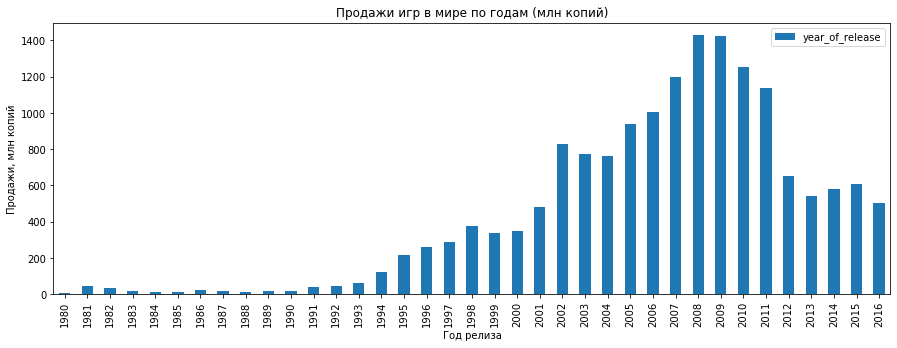

In [25]:
ax1 = games_by_year.plot(x='index', y='year_of_release', kind='bar', figsize=(15,5), title='Продажи игр в мире по годам (млн копий)')
ax1.set_xlabel('Год релиза')
ax1.set_ylabel('Продажи, млн копий')

Видим, что до определенного периода (2008-2009 годы) наблюдается почти прямая зависимость между годом релиза и числом выпускаемых игр: чем старше год, тем меньше представлено игр. Наибольшее количество игр было выпущено в период с 2007 по 2011 годы. В период до 2000 года ежегодно представляли менее 400 игр (а иногда совсем единицы: 21, 15, 9). С 2010 года начинается заметный спад в продажах: это может быть связано с неполными данными в выгрузке за последние годы, потерей интереса к видеоиграм в целом (например, переключение на мобильные игры), а также, возможно, с развитием пиратских сервисов и возможностью приобретения игры без официальной ее оплаты.

## Раздел 3.2. Анализ продаж игр по платформам <a name="step3.2"></a>

Посмотрим, как менялись продажи по платформам.

In [26]:
pivot_platform = data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc ='sum')

In [27]:
pivot_platform

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
pivot_platform.fillna(0).reset_index()

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
3,DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
5,GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,GEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,GG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [29]:
pivot_platform['sales'] = pivot_platform.sum(axis=1)

In [30]:
pivot_platform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 2600 to XOne
Data columns (total 38 columns):
1980     1 non-null float64
1981     1 non-null float64
1982     1 non-null float64
1983     2 non-null float64
1984     2 non-null float64
1985     4 non-null float64
1986     2 non-null float64
1987     2 non-null float64
1988     4 non-null float64
1989     3 non-null float64
1990     4 non-null float64
1991     4 non-null float64
1992     6 non-null float64
1993     5 non-null float64
1994     10 non-null float64
1995     8 non-null float64
1996     8 non-null float64
1997     6 non-null float64
1998     7 non-null float64
1999     8 non-null float64
2000     9 non-null float64
2001     10 non-null float64
2002     8 non-null float64
2003     6 non-null float64
2004     7 non-null float64
2005     8 non-null float64
2006     10 non-null float64
2007     11 non-null float64
2008     9 non-null float64
2009     7 non-null float64
2010     7 non-null float64
2011     9 non-null float

Интересно, что за 37 лет существовала 31 платформа, однако их развитие было очень постепенным: в 80-е годы правила "2600", но затем ее начали вытеснять конкуренты: видно, как с 1983 г. добавилась новая платформа NES, затем количество платформ стало расти, в какой-то момент достигнув 10 (2001 год), затем часть из них потеряли популярность, но приобрели вновь к 2007 году - здесь мы уже видим 11 платформ. В год последнего наблюдения - 2016 - игры были выпущены для 9 платформ. Посмотрим, какие из них стали самыми "раскрученными" по числу проданных для них дисков с играми.

In [31]:
pivot_platform_sorted = pivot_platform.sort_values(by='sales', ascending=False)['sales'].reset_index()

In [32]:
pivot_platform_sorted

,platform,sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [33]:
pivot_platform_sorted_top = pivot_platform_sorted.query('sales > 700')

Посмотрим внимательно на топ-6 по продажам за всю историю (выбрали именно 6, потому что у 7-ого участника рейтинга уже виден значительный отрыв по продажам - больше, чем в 2 раза).

In [34]:
pivot_platform_sorted_top

,platform,sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


In [35]:
pivot_top_platform = pivot_platform[pivot_platform.index.isin(pivot_platform_sorted_top['platform'])]

In [36]:
pivot_top_platform

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,sales
platform,,,,,,,,,,,,,,,,,,,,,
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,802.78
PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,727.58
PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,1233.56
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24


In [37]:
pivot_top_platform = pivot_top_platform.drop(labels='sales', axis=1)

In [38]:
pivot_top_platform

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


Text(0, 0.5, 'Продажи, млн копий')

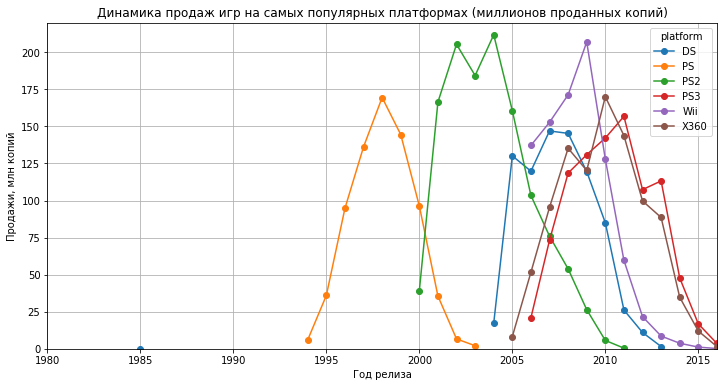

In [39]:
ax2 = pivot_top_platform.T.plot(style='o-', figsize = (12, 6), ylim=(0,220), grid = True, title='Динамика продаж игр на самых популярных платформах (миллионов проданных копий)')
ax2.set_xlabel('Год релиза')
ax2.set_ylabel('Продажи, млн копий')

По графику выручки игр из топ-6 видим, что средний "срок процветания" платформы - примерно десятилетие. За 2-3, иногда 5 лет популярность игры доходит до своего пика (в этот момент отмечаются максимальыне продажи), а затем плавно сходит на нет.
Соответственно, для дальнейшего анализа данных с целью построения прогноза на 2017 год есть смысл работать только с актуальными данными, т.е. не позднее 5-летней давности (чтобы посмотреть на платформы, которые вышли на пик или вот-вот к нему подойдут.

In [40]:
data_actual = data.query('year_of_release > 2010').reset_index()

In [41]:
data_actual

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
3,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
4,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
4018,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
4019,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
4020,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Тогда в нашей таблице остается 4022 строк из 16713 (т.е. почти четверть игр, выпущенных за 37 лет, были созданы за последние 5 лет).

## Раздел 3.3. Определение потенциально прибыльных платформ в 2017 году <a name="step3.3"></a>

Посмотрим на динамику продаж игр за последние 5 лет.

In [42]:
pivot_actual = data_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc ='sum')

In [43]:
pivot_actual

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,63.20,51.36,56.57,43.76,27.78,15.14
DS,26.18,11.01,1.54,NaN,NaN,NaN
PC,35.03,23.22,12.38,13.28,8.52,5.25
PS2,0.45,NaN,NaN,NaN,NaN,NaN
PS3,156.78,107.36,113.25,47.76,16.82,3.60
PS4,NaN,NaN,25.99,100.00,118.90,69.25
PSP,17.82,7.69,3.14,0.24,0.12,NaN
PSV,4.63,16.19,10.59,11.90,6.25,4.25
Wii,59.65,21.71,8.59,3.75,1.14,0.18


Text(0, 0.5, 'Продажи, млн копий')

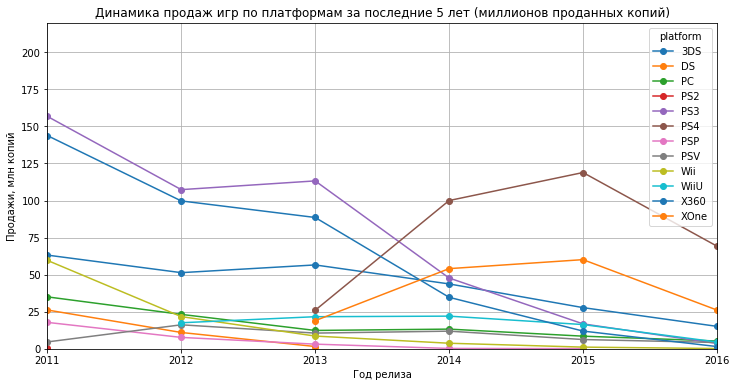

In [44]:
ax3 = pivot_actual.T.plot(style='o-', figsize = (12, 6), ylim=(0,220), grid = True, title='Динамика продаж игр по платформам за последние 5 лет (миллионов проданных копий)')
ax3.set_xlabel('Год релиза')
ax3.set_ylabel('Продажи, млн копий')

График получился несколько "перегруженный", однако для первого взгляда нам нужны данные по всем платформам. 
- Так, мы видим, что свой пик в этот период прошли платформы DS, PS3, Wii, X360, 3DS - хотя в свое время они давали хорошие продажи, сейчас они неуклонно "катятся" к 0.
- PS2, PSP, PC появились на рынке раньше 2011-го года, но не сильно "раскачались" - по ним не видно внушительных пиков продаж, однако они также сейчас находятся в стадии падения.

Посмотрим на тот же график без перечисленных платформ.

In [45]:
pivot_actual_potential = pivot_actual.drop(labels=['3DS', 'DS', 'PS3', 'Wii', 'X360', 'PS2', 'PSP', 'PC'])

In [46]:
pivot_actual_potential

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
PS4,NaN,NaN,25.99,100.00,118.90,69.25
PSV,4.63,16.19,10.59,11.90,6.25,4.25
WiiU,NaN,17.56,21.65,22.03,16.35,4.60
XOne,NaN,NaN,18.96,54.07,60.14,26.15


Text(0, 0.5, 'Продажи, млн копий')

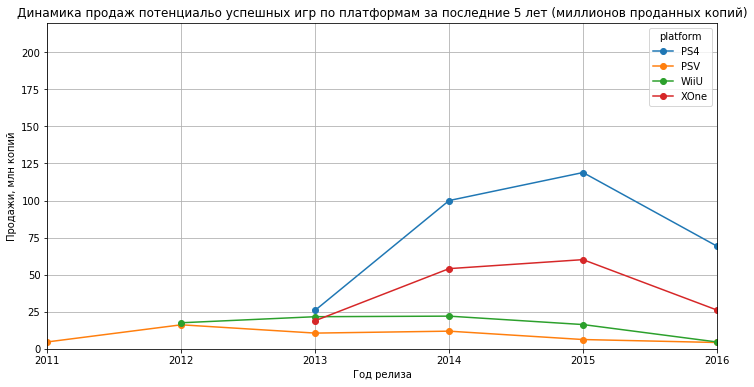

In [47]:
ax4 = pivot_actual_potential.T.plot(style='o-', figsize = (12, 6), ylim=(0,220), grid = True, title='Динамика продаж потенциальо успешных игр по платформам за последние 5 лет (миллионов проданных копий)')
ax4.set_xlabel('Год релиза')
ax4.set_ylabel('Продажи, млн копий')

Среди оставшихся четырех платформ, появившихся с 2011 по 2013 годы, 2 идут очень неуверенно, не показывая потенциала роста. И лишь 2 платформы - PS4 и XOne показывают неплохой рост, особенно учитывая тот факт, что за 2016 год данные могут быть пердставлены не полные, а значит, возможно рост по этим платформам, начатый в предыдущие годы, может продолжаться. Таким образом, эти 2 платформы - потенциально прибыльные.

## Раздел 3.4. Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам <a name="step3.4"></a>

Теперь построим диаграмму размаха по глобальным продажам игр в разбивке по платформам. Возьмём те платформы, которые являются актуальными (т.е. релиз которых пришелся на период с 2011 по 2016 годы).

In [48]:
import warnings
warnings.filterwarnings('ignore')

(0, 2)

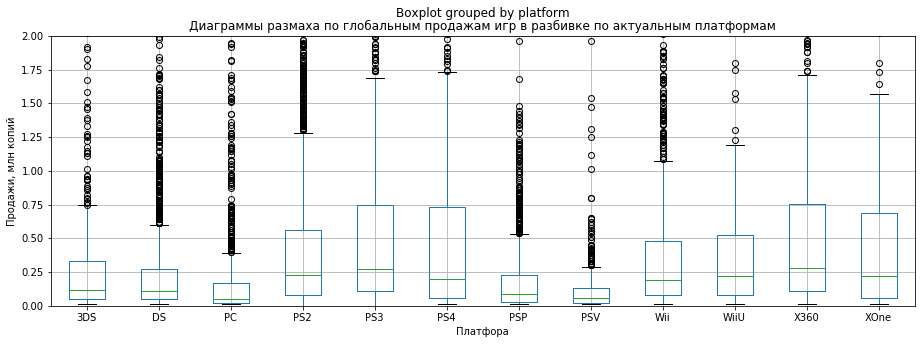

In [49]:
ax5 = data[data.platform.isin(pivot_actual.index)].boxplot('total_sales', by='platform', figsize=(15,5)) 
ax5.set_xlabel('Платфора')
ax5.set_ylabel('Продажи, млн копий')
ax5.set_title('Диаграммы размаха по глобальным продажам игр в разбивке по актуальным платформам')
ax5.set_ylim(0, 2)

Видим, что для каждой платформы были свои значения медианных продаж дисков каждой игры, при этом по всем платформам большое количество игр продавались "аномально хорошо": т.е. их значения продаж выходят за рамки статистически нормальных продаж игр, иногда выхходят очень сильно (это хорошо видно, если не ограничивать ось y: попадаются даже значения в 80 млн проданных копий).
Наибольшей медианой (более 0,25 млн проданных копий) отличаются игры платформ PS3 и X360 - "прародители" тех платформ, которые на текущий момент мы выделили как потенциально наиболее прибыльные. Наибольшая верхняя граница "нормальных" продаж принадлежит тем же платформам + PS4 - еще один признак успешности игр данных платформ. 

## Раздел 3.5. Анализ влияния оценок пользователей и критиков на продажи игр <a name="step3.5"></a>

На следующем этапе посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Как мы увидели ранее, наиболее популярной платформой за актуальный период является PS2 - игры для неё продаются в наибольшем диапазоне чисел + она является потенциально успешной в 2017 году. Посмотрим, как в период с 2011 года на нее влияли отзывы пользователей и критиков.

In [50]:
data_actual_PS4 = data_actual.query('platform == "PS4"')

In [51]:
data_actual_PS4

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
9,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
20,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
23,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
24,92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
3927,16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
3936,16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
3937,16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


Для PS4 за этот период всего было создано 392 игры.

При оценке корреляции нам могут помешать отсутствующие значения в колонках с оценками игроков и критиков, поэтому избавимся от таких строк)

In [52]:
data_actual_PS4.dropna(subset = ['user_score'], inplace = True)
data_actual_PS4.dropna(subset = ['critic_score'], inplace = True)

In [53]:
data_actual_PS4

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
20,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
24,92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
25,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
30,105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
3923,16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
3924,16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
3936,16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


In [54]:
data_actual_PS4['critic_score'].corr(data_actual_PS4['total_sales'])

0.40589480145836687

In [55]:
data_actual_PS4['user_score'].corr(data_actual_PS4['total_sales'])

-0.03362497596528878

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe236befc50>,
      dtype=object)

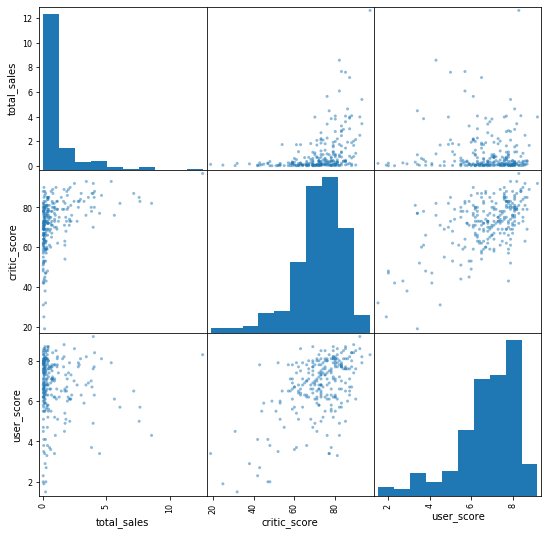

In [56]:
pd.plotting.scatter_matrix(data_actual_PS4[['total_sales', 'critic_score', 'user_score']], figsize=(9, 9))

Диаграмма рассеяния позволяет увидеть наличие или отстутсвие прямой зависимости между показателями.
Коэффициент корреляции между оценками пользователей и уровнем продаж близок к 0 и по диаграмме мы наблюдаем отсутствующую прямую линейную зависимость между этими показателями. 

Корреляция между оценками критиков и уровнем продаж уже выше - на уровне 0,4. И по графику видно, что самые высокие продажи приносят игры с одними из самых высоких оценок критиков, хотя до определенного уровня оценки (примерно до 60 баллов из 100) продажи почти по всем играм крайне низкие.

Интересно также посмотреть, какой коэффициент корреляции между оценками критиков и пользователей, потому что судя по графику, есть хорошо видная прямая зависимость, что, в целом, является довольно логичным.

In [57]:
data_actual_PS4['user_score'].corr(data_actual_PS4['critic_score'])

0.5576539782764632

Действительно, этот коээфициент выше других: пользователи и критики похожим образом оценивают одни и те же игры, хоть и не всегда.

Теперь посмотрим, будет ли наблюдаться похожая корреляция для продаж игр на других платформах суммарно.

In [58]:
data_actual_other = data_actual.query('platform != "PS4"')

In [59]:
data_actual_other.dropna(subset = ['user_score'], inplace = True)
data_actual_other.dropna(subset = ['critic_score'], inplace = True)

In [60]:
data_actual_other

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
5,34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
6,35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
4000,16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01
4013,16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
4014,16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01


In [61]:
data_actual_other['critic_score'].corr(data_actual_other['total_sales'])

0.31312879635422886

In [62]:
data_actual_other['user_score'].corr(data_actual_other['total_sales'])

0.040438581565856016

В таком случае коэф-т корреляции между оценкой критиков и продажами равен 0,3, т.е. зависимость меньше, чет та, которую мы наблюдали для PS4. Скорее всего, дело в том, что есть менее популярные платформы, для которых в принципе характерно меньше продаж, даже при высоких оценках. 
Корреляция между оценкой пользователей и продажами, как и в предыдущем случае, близка к 0, значит здесь также прямой линейной зависимости не наблюдается. 


## Раздел 3.6. Анализ распределения игр по жанрам <a name="step3.6"></a>

Определим, какие жанры являются наиболее прибыльными.

In [63]:
pivot_actual_genre = data_actual.pivot_table(index='genre',  values=['total_sales', 'name'], aggfunc={'total_sales': np.sum,
                             'name': 'count'}).reset_index()

In [64]:
pivot_actual_genre.sort_values('total_sales', ascending=False).reset_index()

,index,genre,name,total_sales
0,0,Action,1269,557.80
1,8,Shooter,329,402.91
2,7,Role-Playing,465,245.63
3,10,Sports,389,237.15
4,3,Misc,375,139.42
5,4,Platform,122,88.68
6,6,Racing,180,88.31
7,2,Fighting,159,66.90
8,9,Simulation,136,50.26
9,1,Adventure,410,45.04


Text(0.5, 1.0, 'Суммарные продажи игр по жанрам в 2011-2016 гг')

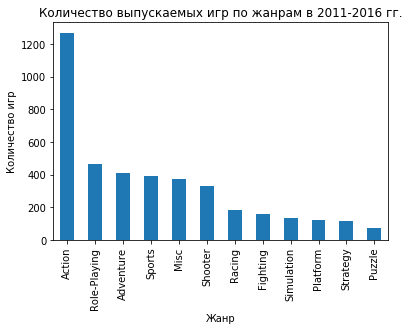

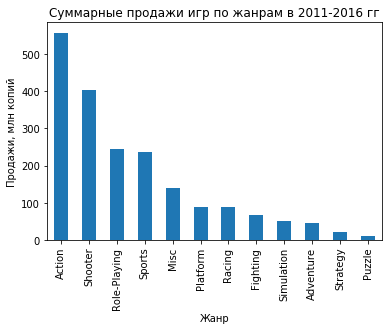

In [65]:
ax6 = pivot_actual_genre.sort_values('name', ascending=False).reset_index().plot(x='genre', y='name', kind='bar', legend=False)
ax6.set_xlabel('Жанр')
ax6.set_ylabel('Количество игр')
ax6.set_title('Количество выпускаемых игр по жанрам в 2011-2016 гг.')

ax7 = pivot_actual_genre.sort_values('total_sales', ascending=False).reset_index().plot(x='genre', y='total_sales', kind='bar', legend=False)
ax7.set_xlabel('Жанр')
ax7.set_ylabel('Продажи, млн копий')
ax7.set_title('Суммарные продажи игр по жанрам в 2011-2016 гг')

Самым популярным жанром по числу игр в нем и суммарным продажам стал жанр Экшен: количество игр в данном жанре почти в 2 раза выше, чем у ближайших "преследователей" - игр в жанре РПГ и Приключений. При этом интересно, что 2-ое место по числу проданных копий принадлежит не им, а жанру Стрелялки - всего 329 выпущенных игр и 402,9 миллиона проданных дисков. Т.е. каждая Стрелялка приносит больше продаж, чем игра любого другого жанра. На 3-ем месте по продажам - уже упомянутый жанр РПГ. 

Меньше всего игр было выпущено в жанрах Плтформер (бродилки), Стратегии и Паззлы.

Топ-3 самых малоприбыльных жанров выглядит похоже - Приключения, Стратегии и Паззлы. 

### Вывод

Был проведен исследовательский анализ данных.
1. Определено, что до 2009 года количество выпущенных игр было в среднем тем больше, чем о более недавнем периоде идет речь. При этом наибольшее количество игр было выпущено в период с 2007 по 2011 годы. В период до 2000 года ежегодно было выпущено менее 400 игр. С 2010 года игровую индустрию настиг спад.
2. Выявлено, что самой популярной платформой за все время стала PS2.
3. Вычислен средний "срок жизни" платформы - примерно 10 лет.
4. Определены потенциально прибыльные платформы в 2017 году, т.е. те, которые по оценке ожидает рост в ближайшее время: это PS4 и XOne.
5. Определены платформы с наилучшим показателем медианных продаж игр и их наибольшим размахом статистически нормального значения: PS3, X360, PS4. Т.е. средняя игра, выпущенная для этих платформ, продается лучше, чем для других.
6. Средняя оценка критиков влияет на продажи игр начиная с определенного уровня (применро от 60 баллов из 100), при меньшей оценке корреляция незаметна. Самые большие проданные тиражи отмечены по играм с наибольшими оценками. Оценка же пользователей напрямую на продажи не влияет.
7. Топ-3 жанра игр, приносящих наибольшую прибыль: Экшен, Стрелялки и РПГ. При этом в среднем каждая стрелялка приносит больше прибыли, чем игра любого другого жанра.

# Раздел 4. Определение портрета пользователя по регионам <a name="step4"></a>

Определим самые популярные платформы и жанры в разрезе регионов, а также оценим влияние возрастного рейтинга на продажи.

In [66]:
def top_5_platform(data, region):
    pivot = data.pivot_table(index='platform', values=region, aggfunc ='sum').sort_values(by=region, ascending=False)[region].reset_index()
    pivot['percentage'] = pivot[region] / data[region].sum()
    return pivot[:5]

In [67]:
top_5_platform(data_actual, 'na_sales')

,platform,na_sales,percentage
0,X360,226.80,0.273332
1,PS3,168.26,0.202782
2,PS4,108.74,0.131050
3,XOne,93.12,0.112225
4,3DS,82.65,0.099607


In [68]:
top_5_platform(data_actual, 'eu_sales')

,platform,eu_sales,percentage
0,PS3,163.10,0.243509
1,PS4,141.09,0.210648
2,X360,117.10,0.174831
3,3DS,61.27,0.091476
4,PC,56.70,0.084653


In [69]:
top_5_platform(data_actual, 'jp_sales')

,platform,jp_sales,percentage
0,3DS,100.62,0.409607
1,PS3,49.39,0.201058
2,PSP,24.04,0.097863
3,PSV,21.84,0.088907
4,PS4,15.96,0.064970


Text(0.5, 1.0, 'Суммарные продажи игр по платформам в 2011-2016 гг в разрезе регионов')

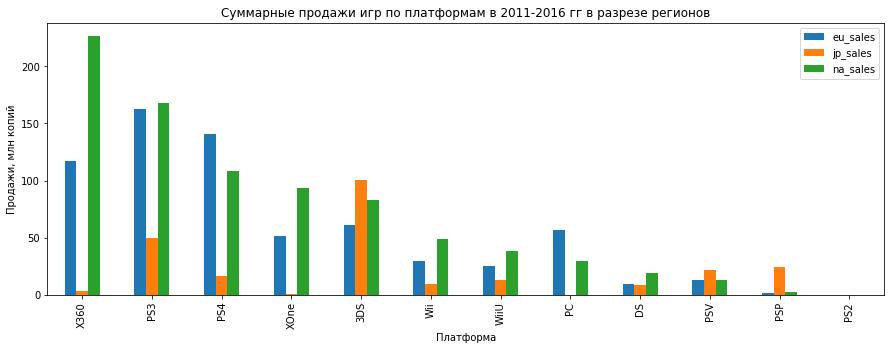

In [70]:
data_platform = data_actual.pivot_table(index='platform', values=['na_sales', 'jp_sales', 'eu_sales'], aggfunc ='sum').sort_values('na_sales', ascending=False).reset_index()
ax8 = data_platform.plot(kind='bar', figsize=(15,5))
ax8.set_xlabel('Платформа')
ax8.set_ylabel('Продажи, млн копий')
ax8.set_xticklabels(data_platform['platform'])
ax8.set_title('Суммарные продажи игр по платформам в 2011-2016 гг в разрезе регионов')

Анализ продаж игр в разрезе регионов показывает, что у каждого региона есть своя лидирующая платформа по продажам. Так, в Северной Америке наиболее популярной является платформа X360 с 27% рынка, а замыкает пятерку 3DS с долей в 10%. В Европе топ-5 похож, однако здесь лидером является PS3 с 24%.
Совсем другую картину мы наблюдаем в Японии: здесь на первой строке - не очень популярная в других странах 3DS (c 41%), также в топ-5 присутствуют PSP и PSV, доля продаж которых в Америке и Европе составляет точно меньше 10%. Еще одна особенность Японии - более выраженная "разобщенность" долей внутри топа: здесь платформа-лидер имеет долю в 2 раза выше, чем платформа на 2-ой строке и топ-2 занимают более 60% рынка (в Европе и Америке это 45% и 47% соответственно).

In [71]:
def top_5_genre(data, region):
    pivot = data.pivot_table(index='genre', values=region, aggfunc ='sum').sort_values(by=region, ascending=False)[region].reset_index()
    pivot['percentage'] = pivot[region] / data[region].sum()
    return pivot[:5]

In [72]:
top_5_genre(data_actual, 'na_sales')

,genre,na_sales,percentage
0,Action,230.92,0.278297
1,Shooter,194.43,0.234321
2,Sports,108.70,0.131002
3,Role-Playing,83.78,0.100969
4,Misc,69.69,0.083988


In [73]:
top_5_genre(data_actual, 'eu_sales')

,genre,eu_sales,percentage
0,Action,199.12,0.297287
1,Shooter,148.02,0.220995
2,Sports,88.48,0.132101
3,Role-Playing,62.30,0.093014
4,Racing,40.58,0.060586


In [74]:
top_5_genre(data_actual, 'jp_sales')

,genre,jp_sales,percentage
0,Role-Playing,79.87,0.325137
1,Action,63.62,0.258986
2,Misc,17.60,0.071647
3,Fighting,12.38,0.050397
4,Platform,12.13,0.049379


(0, 0.4)

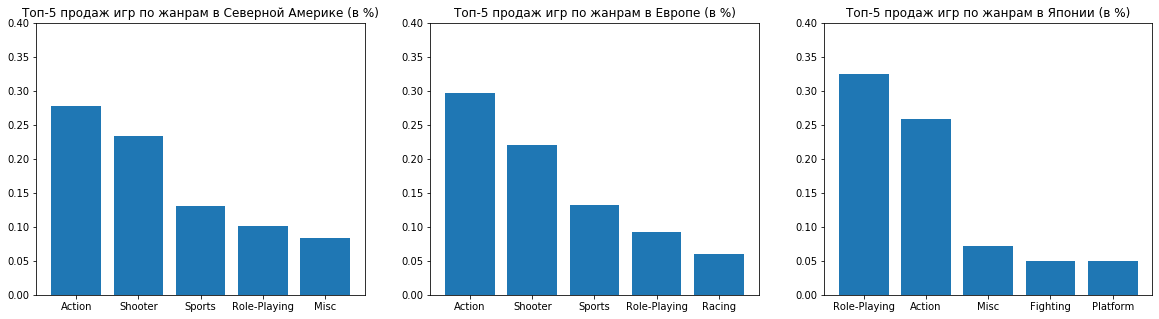

In [90]:
top_5_na = top_5_genre(data_actual, 'na_sales')
top_5_eu = top_5_genre(data_actual, 'eu_sales')
top_5_jp = top_5_genre(data_actual, 'jp_sales')

fig, (ax_na, ax_eu, ax_jp) = plt.subplots(1, 3, figsize = (20,5))
                                          
ax_na.bar(top_5_na['genre'], top_5_na['percentage'])
ax_na.set_title('Топ-5 продаж игр по жанрам в Северной Америке (в %)')
ax_na.set_ylim(0, 0.4)
ax_eu.bar(top_5_eu['genre'], top_5_eu['percentage'])
ax_eu.set_title('Топ-5 продаж игр по жанрам в Европе (в %)')
ax_eu.set_ylim(0, 0.4)
ax_jp.bar(top_5_jp['genre'], top_5_jp['percentage'])
ax_jp.set_title('Топ-5 продаж игр по жанрам в Японии (в %)')
ax_jp.set_ylim(0, 0.4)

Text(0.5, 1.0, 'Суммарные продажи игр по жанрам в 2011-2016 гг в разрезе регионов')

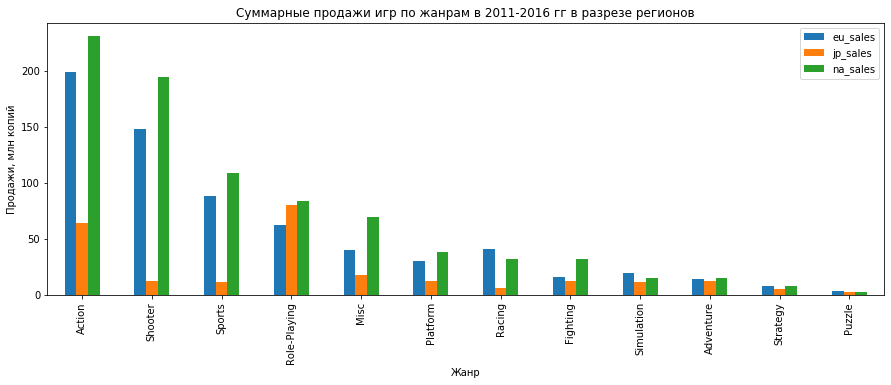

In [91]:
data_genre = data_actual.pivot_table(index='genre', values=['na_sales', 'jp_sales', 'eu_sales'], aggfunc ='sum').sort_values('na_sales', ascending=False).reset_index()
ax9 = data_genre.plot(kind='bar', figsize=(15,5))
ax9.set_xlabel('Жанр')
ax9.set_ylabel('Продажи, млн копий')
ax9.set_xticklabels(data_genre['genre'])
ax9.set_title('Суммарные продажи игр по жанрам в 2011-2016 гг в разрезе регионов')

В Америке и Европе самым популярным жанром, как и в целом по миру, является Экшен - 28% и 30% продаж соответственно приходится на них. Далее следуют Стрелялки и Спорт.
Япония вновь отличилась: здесь на первом месте мы видим игры жанра РПГ: почти треть продаж - 33% приходится на них. В Европе и Америке данный жанр находится на 4-ой строке с 9 и 10% соответственно. Помимо этого японцы также выбирают популярный в остальном мире Экшен и чуть меньше - игры в жанре Misc.

In [ ]:
def top_rating(data, region):
    pivot = data.pivot_table(index='rating', values=region, aggfunc ='sum').sort_values(by=region, ascending=False)[region].reset_index()
    pivot['percentage'] = pivot[region] / data[region].sum()
    return pivot

In [ ]:
top_rating(data_actual, 'na_sales')

In [ ]:
top_rating(data_actual, 'eu_sales')

In [ ]:
top_rating(data_actual, 'jp_sales')

In [ ]:
data_rating = data_actual.pivot_table(index='rating', values=['na_sales', 'jp_sales', 'eu_sales'], aggfunc ='sum').sort_values('na_sales', ascending=False).reset_index()
ax10 = data_rating.plot(kind='bar', figsize=(10,5))
ax10.set_xlabel('Возрастной рейтинг')
ax10.set_ylabel('Продажи, млн копий')
ax10.set_xticklabels(data_rating['rating'])
ax10.set_title('Суммарные продажи игр по возрастным рейтингам в 2011-2016 гг в разрезе регионов')

По регионам Европа и Северная Америка можно сделать вывод, что наибольшие продажи приносят игры для старших подростков (17+), на втором месте - игры с возрастным цензом "для всех". На третьем и четвертом с неблоьшой разницей = игры для младших подростков: 10+ и 13+.
В Японии же по какой-то причине очень много продаваемых игр не имеет возрастного ценза (предположительно, много японских игр имеют специфику, характерную только для своей страны, скорее всего эти игры даже не переведены на другие языки и е продается в других странах - поэтому комиссия не оценивает их).

Также стоит отметить, что игры для детей младшего возраста практичеси не приноят продаж в мире, хотя, как мы видели ранее, в принципе выпускается очень мало игр с таким рейтингом.

### Вывод

Был составлен портрет пользоваеля каждого региона.
1. Американцы отдают предпочтение играм на платформах X360 (27% продаж в регионе), в жанре Экшен (28%)
2. Европейцы выбирают платформу PS3 (24%) и также жанр Экшен (30%)
3. Японцы отличаются от жителей других регионов: они покупают игры для не очень популярной на Западе 3DS3 (41% продаж) в не очень популярном жанре РПГ (33%).
4. Игры категории 17+ наиболее популярны на Западе (по 37% продаж приходится на них), тогда как большинство японцев отдают предпочтение играм ценза "для всех" (15%).

# Раздел 5. Проверка гипотез <a name="step5"></a>

В данном разделе нам предстоит проверить 2 гипотезы:
1. средние пользовательских рейтинги платформ Xbox One и PC равны;
2. средние пользовательские рейтинги жанров Action и Sports различны.

## Раздел 5.1. Гипотеза о равенстве средних пользовательских рейтингов  платформ Xbox One и PC <a name="hyp1"></a>

Для проверки равенства средней оценки пользователей двух платформ сформулируем нулевую гипотезу H0: средние пользовательские оценки игр на плфтформах Xbox One и PC равны. Тогда альтернативная гипотеза H1 будет звучать так: средняя оценка игроков плфтформы Xbox отличается от средней оценки игроков платформы PC. 

In [ ]:
data_actual_XOne = data_actual.query('platform == "XOne"')
data_actual_PC = data_actual.query('platform == "PC"')

In [ ]:
data_actual_XOne.info()

In [ ]:
data_actual_PC.info()

В обеих таблицах в столбце user_score есть пропущенные значения: они помещают нам при провекрке гипотез. Поэтому уберем из таблиц такие строки.

In [ ]:
data_actual_XOne.dropna(subset = ['user_score'], inplace = True)
data_actual_PC.dropna(subset = ['user_score'], inplace = True)

Посмотрим на дисперсии выборок, чтобы понять, с каким параметром использовать проверку гипотезы через T-критерий Стьюдента.

In [ ]:
print(np.var(data_actual_XOne['user_score']))
print(np.var(data_actual_PC['user_score']))

Значения дисперсий не очень близки, поэтому используем параметр equal_var=False.

In [ ]:
alpha = .05

results_platforms = st.ttest_ind(
    data_actual_XOne['user_score'], 
    data_actual_PC['user_score'],
    equal_var=False)

print('p-значение:', results_platforms.pvalue)

if (results_platforms.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Получается, средние пользовательские оценки двух платформ совпадают до статистического уровня значимости.

## Раздел 5.2. Гипотеза о различии пользовательских рейтингов жанров Action и Sports <a name="hyp2"></a>

Для данной задачи нулевая гипотеза H0 будет формулироваться следующим образом: средний пользовательский рейтинг по играм жанров Action и Sports равны. Тогда альтернативная гипотеза H1: средняя оценка пользователей игр жанра Action отличается от средней оценки пользователей игра жанра Sports. Для проверки также воспользуемся t-тестом.

In [ ]:
data_actual_Action = data_actual.query('genre == "Action"')
data_actual_Sports = data_actual.query('genre == "Sports"')

In [ ]:
data_actual_Action.info()

In [ ]:
data_actual_Sports.info()

Вновь в обеих таблицах в столбце user_score есть пропущенные значения, уберем из таблиц такие строки.

In [ ]:
data_actual_Action.dropna(subset = ['user_score'], inplace = True)
data_actual_Sports.dropna(subset = ['user_score'], inplace = True)

Сравним дисперсии выборок.

In [ ]:
print(np.var(data_actual_Action['user_score']))
print(np.var(data_actual_Sports['user_score']))

Вновь дисперсии не совпадают, поэтому используем параметр equal_var=False.

In [ ]:
results_genres = st.ttest_ind(
    data_actual_Action['user_score'], 
    data_actual_Sports['user_score'],
    equal_var=False)

print('p-значение:', results_genres.pvalue)

if (results_genres.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Таким образом, средние пользовательские оценки жанров Action и Sports не равны.

### Вывод

Мы проверили 2 гипотезы: о равенстве средней оценки пользователей платформ Xbox One и PC и о равенстве средней оценки игроков жанров Action и Sports. В результате вторая гипотеза была отвергнута, а вот первую отвергнуть не удалось. Значит можно говорить о статистическом равенстве пользовательской оценки игр для платформ Xbox One и PC, в отличие от средней оценки игр жанров Action и Sports.

# Общий вывод <a name="step6"></a>

Мы изучили информацию о продажах компьютерных игр за период с 1980 по 2016 год в трех регионах: Северной Америке, Европе и Японии (+ в остальном мире).

Была проведена предобработка исходных данных: названия столбцов приведены к нижнему регистру, убраны строки, где не указаны название игры или жанра. Заменены значения tbd в столбце с оценкой пользователей на пропуск, т.к. такое значение (to be determined) не позволяет нам провести адекватный анализ. Столбцы приведены к нужным типам данных.

В ходе исследовательского анализа данных было определено, что средний "срок жизни" каждой платформы - примерно 10 лет.
Были выявлены платформы, по которым по оценке ожидается рост продаж в 2017 году - PS4 и XOne.
Также было рассчитано, что средняя оценка критиков имеет влияние напрямую на продажи при определенном уровне оценки (высоком, более 60 баллов из 100). Оценка же пользователей в ходе анализа не показала прямого влияния на уровень продаж. Помимо этого, определено, что среди всех жанров Стрелялки приносит больше прибыли, чем игра любого другого жанра.

Анализ продаж игр в разрезе регионов показал, что американцы и европейцы отдают предпочтение жанру Экшен, тогда как японцы больше любят РПГ. Платформы все они выбирают разные. При этом наибольшим спросом на Западе пользуются игры восзрастной категории 17+, а на Западе - "для всех".

Статистический анализ показал, что нельзя говорить о статистическом равенстве пользовательской оценки игр жанров Action и Sports, при этом средние оценки игр для платформ Xbox One и PC статистически совпадают. 


По результатам проведенного анализа руководству магазина «Стримчик» предлагается провести рекламную кампанию на 2017 год, акцентируя внимание на следующем:
- для пользователей из Америки сделать ставку на игры жанров Экшен (как самые часто выпускаемые) и Стрелялки (как самые продаваемые по числу копий на одну игру). Платформы: XOne и PS4 (обе уже хорошо знакомы рынку). 
- для европейцев - аналогичные жанры, но XOne придется больше "раскручивать", т.к. он пока мало прижился в Европе
- в Японии стремительно теряет популярность яркий лидер - платформа 3DS. Предыдущее поколение xBox не сильно выстрелило, поэтому вряд ли стоит здесь ожидать популярности XOne. А вот PS4 вполне имеет все шансы занять новую лидирующую позицию в следующем году. Из жанров стоит обратить внимание на Экшен и РПГ.
В целом во всех странах нет смысла в рекламной кампании обращать внимание на пользовательские оценки. Рейтинг критиков работает сам за себя: игроки, которые видят высокие оценки экспертов, придут за соответствующими играми. Возрастной ценз тоже сложно назвать решающим фактором при принятии решения пользователем: в основном хорошо продаются массовые игры "для всех" и категории 17+. 

